In [1]:
from pylab import *
import matplotlib.pyplot as plt
# import bloch_phase as bloch
from progressbar import ProgressBar, Percentage, Bar, ETA
import pulse

In [2]:
import bloch
def zMag(exchangeTime, LTMs, pools, duration, freqdata):

    gyrogamma = 267.522 #units are in microTesla
    power = math.pi/(gyrogamma*duration)

    pulseShape = 'bp' 
    # specify 'bp', 'gaussian', 'fermi', 'sinc', or 'sg' for sinc-guassian

    sat_pulse_amplitude = power# in micro Tesla
    sat_pulse_duration = duration# in seconds
    post_pulse_delay = exchangeTime# in seconds
    crusher_gradient = False # define True or False

    pulse_repeats = 1

    hard_pulse = pulse.returnPulse(pulseShape, sat_pulse_duration, post_pulse_delay, pulseAmplitude=sat_pulse_amplitude)

	# Solve the Bloch equations
	#mx, my, b=bloch.solve((freewater, macromolecular), freqdata, hard_pulse, crusher=False, magnetic_field=11.7, pulse_repeat = LTMs, post_dynamic_delay=inf)
    b=bloch.solve(pools, freqdata, hard_pulse, crusher=False, magnetic_field=7.0, pulse_repeat = LTMs, post_dynamic_delay=100)
    return b


# labelling efficiency

In [3]:
## Define pools
freewater = bloch.Pool('freewater', t1 = 1.6, t2 = 0.062, lifetime = 1., chemical_shift = 1000.0, concentration = 111200)
macromolecular = bloch.Pool('macromolecular', t1 = 1, t2 = 9e-6, lifetime = 1/40., chemical_shift = 0.0001, concentration =0.001)

amide = bloch.Pool('amide', t1 = 1., t2 = 0.1, lifetime = 1/1e4, chemical_shift = 10, concentration = 72.)


In [4]:
# need to change RF pulse shape to gs

field = 42.58*7.0
freqdata = linspace(15,-15,101)
pulseDuration = 1e2/1e6
ltmDur = 2/1000.
LTMs = 1

pools=(freewater, amide, macromolecular)

invers_Sim = zMag(0, LTMs, pools, pulseDuration, freqdata)
invers_Sim1 = invers_Sim[7,:,-1]*111200/50.
invers_Sim2 = invers_Sim[6,:,-1]

117.433057976


In [5]:
##================================================
##
## Setup the Pulse
##
##================================================

field = 42.58*7.0
freqdata = r_[10]
duration = logspace(1., 3., 51)/1e6    #us
exchangeTime = r_[2.]/1000.         #ms
LTMs = 1
exchangeRates = logspace(0, 5, 101)

##================================================
##
## Simulate magnetisation
##
##================================================
# freewater = bloch.Pool('freewater', t1 = 1.6, t2 = 0.062, lifetime = 1., chemical_shift = 1000.0, concentration = 111200)
# macromolecular = bloch.Pool('macromolecular', t1 = 1.6, t2 = 0.00006, lifetime = 1/60., chemical_shift = 0.001, concentration = 0.001)

freewater = bloch.Pool('freewater', t1 = 1.6, t2 = 0.062, lifetime = 1., chemical_shift = 1000.0, concentration = 111200)
macromolecular = bloch.Pool('macromolecular', t1 = 1, t2 = 9e-6, lifetime = 1/40., chemical_shift = 0.0001, concentration = 0.001)

b = zeros((9, len(exchangeRates), len(duration),len(freqdata)))
pbar = ProgressBar(widgets=['Flex Simulation ', Percentage(), Bar(), ETA()], maxval=b.shape[1]).start()


# varied duration and exchange rate
for ai, ami in enumerate(exchangeRates):
    for pi, p1 in enumerate(duration):
#         amide = bloch.Pool('amide', t1 = 1.6, t2 = 0.1, lifetime = 1/ami, chemical_shift = 10, concentration = 72.)
        amide = bloch.Pool('amide', t1 = 1., t2 = 0.1, lifetime = 1/ami, chemical_shift = 10, concentration = 72.)

        pools = (freewater, amide, macromolecular)
        temp = zMag(0, LTMs, pools, p1, freqdata)
#               zMag(ltmDur, LTMs, pools, pulseDuration, freqdata)
        b[:, ai, pi] = temp[:,:,-1]
    pbar.update(pi)
pbar.finish()

1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871


107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651

97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041

89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152

74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538

74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538

1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434

16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.876278

29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.37640

89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152

24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188

61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424

15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305

67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.26138903

35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.9023593

81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490

20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.4806920

51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018

16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.876278

74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538

24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188

56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625

15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305

35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.9023593

89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152

38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.49785049

12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.00221

42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989

11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.765631

22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.974241

38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.49785049

67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.26138903

61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424

56.20699538085856
51.261389034970534
46.7509424403333
42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333
42.63736625

42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871
1174.330579761587
1071.002217729677
976.7656315436836
890.8208434781601
812.4382651762567
740.9525041482568
675.7567152311151
616.2974490583215
562.0699538085859
512.613890349706
467.5094244033336
426.37366255688244
388.85740186775575
354.64216546717034
323.4374989987113
294.9785049409909
269.02359388318445
245.3524336639464
223.76407896387101
204.07526547354206
186.1188541563052
169.74241239905217
154.8069200063565
141.18558905310036
128.76278757727658
117.43305797615871
107.1002217729677
97.67656315436835
89.08208434781598
81.24382651762562
74.09525041482567
67.57567152311148
61.62974490583212
56.20699538085856
51.261389034970534
46.7509424403333


42.63736625568824
38.88574018677557
35.46421654671703
32.34374989987114
29.497850494099087
26.902359388318438
24.535243366394667
22.376407896387114
20.407526547354227
18.61188541563053
16.97424123990522
15.480692000635651
14.118558905310035
12.87627875772766
11.743305797615871


In [6]:
Z = 1-b[7,:,:,-1]*111200/70.

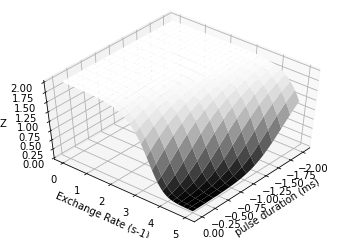

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 


fig = plt.figure()
ax = fig.gca(projection='3d')
Y = exchangeRates
X = duration*1e3
X, Y = np.meshgrid(X, Y)
Z = 1-b[7,:,:,-1]*111200/72.

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

ax.plot_surface(log10(X), log10(Y), Z, rstride=4, cstride=4, alpha=1., shade=True, cmap=cm.Greys_r)
# cset = ax.contour(log10(X), log10(Y), Z, 2, zdir='x', colors='k',offset=-0.5)
# cset = ax.contour(log10(X), log10(Y), Z, 2, zdir='y', colors='k', offset=-3.)
# cset = ax.contour(log10(X), log10(Y), Z, 4, zdir='z', colors='k', offset=0.5)

# clabel(cset, fontsize=100)

ax.set_ylabel('Exchange Rate (s-1)')
# ax.set_xlim(-0.5, 5)
ax.set_xlabel('pulse duration (ms)')
# ax.set_ylim(-3., 0)

ax.set_zlabel('Z')
ax.set_zlim(0.0, 2)

ax.view_init(elev=50, azim=40)
plt.show()


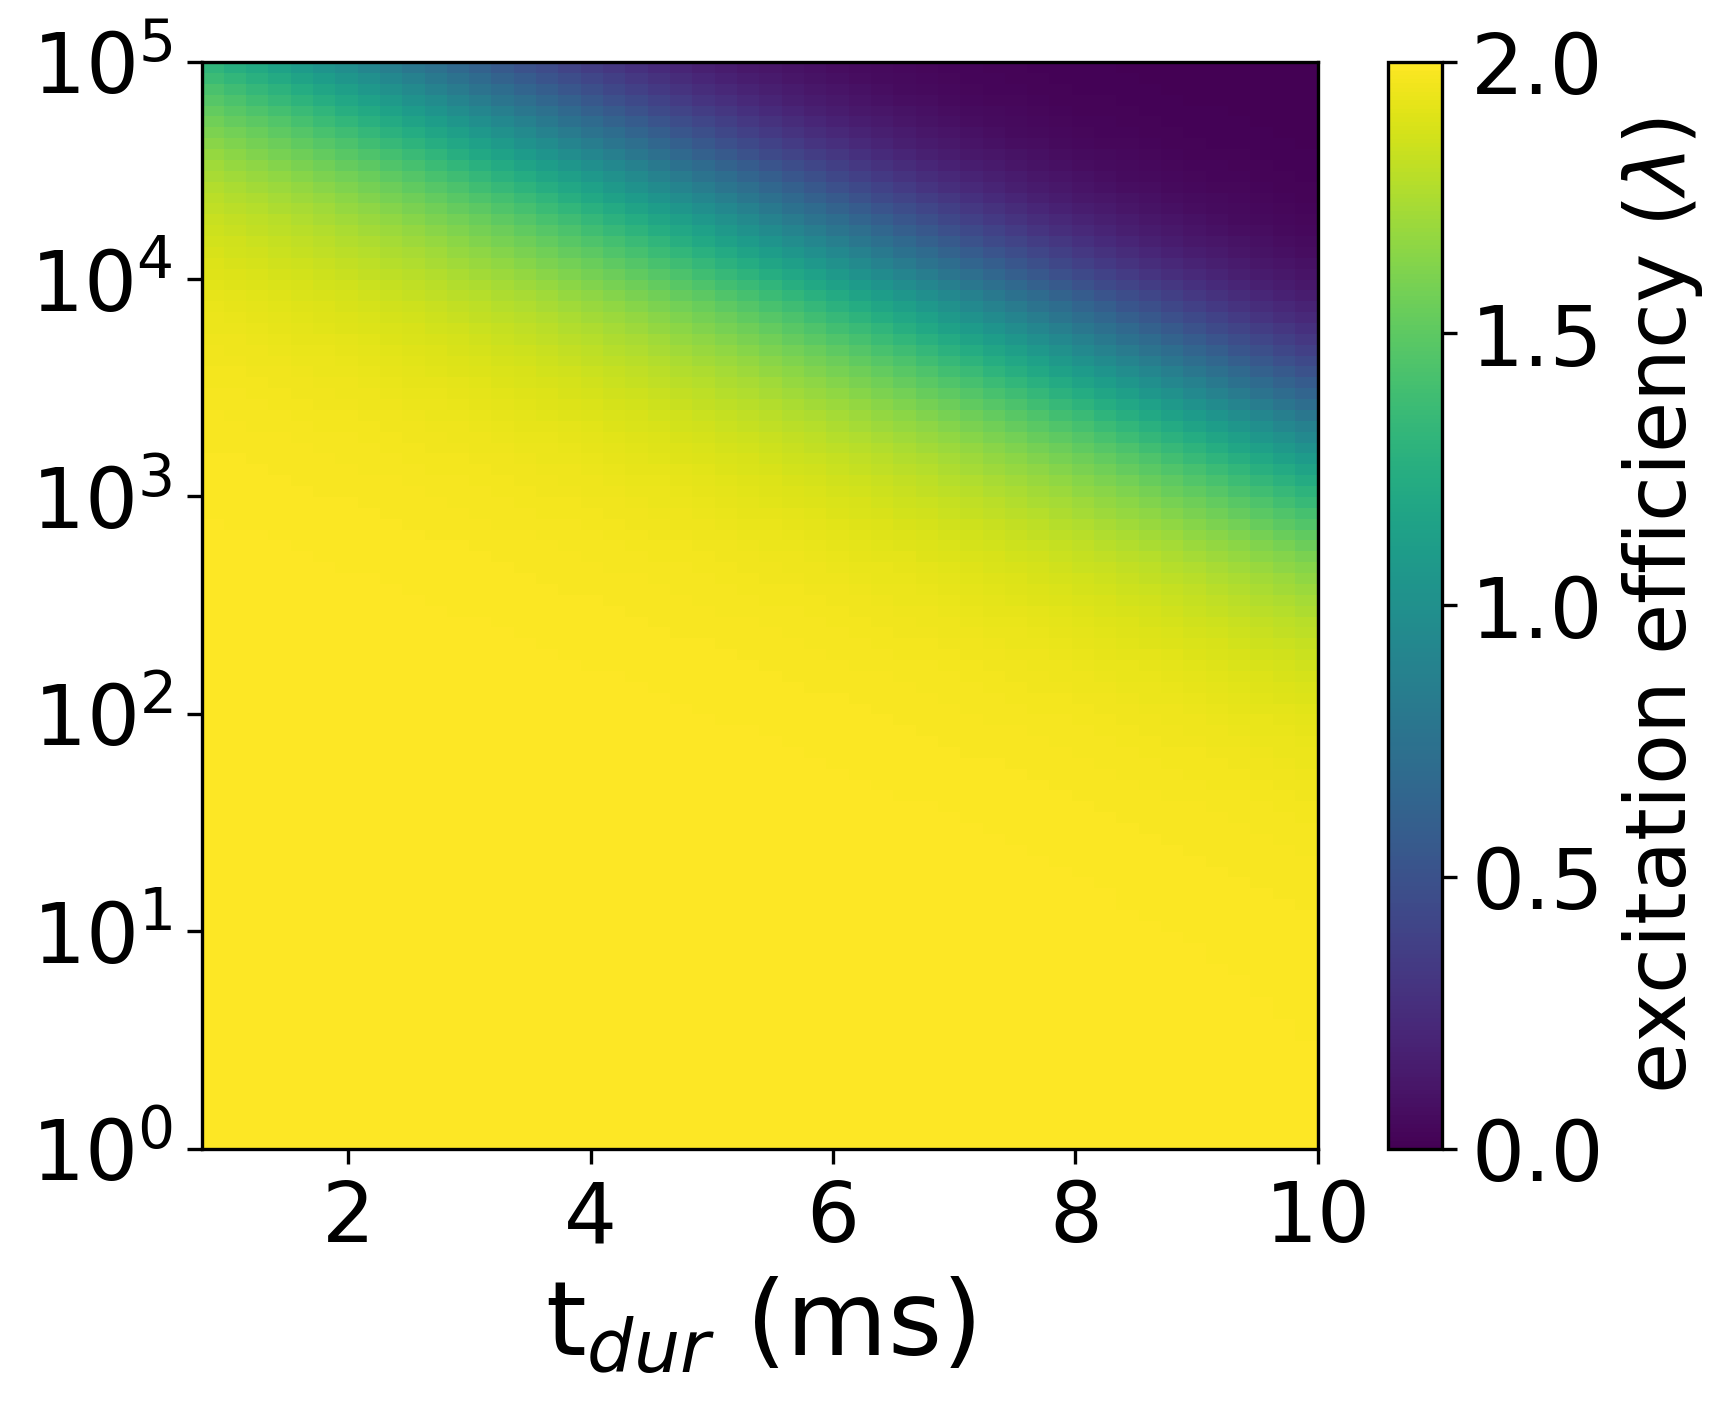

In [8]:
fig, ax = plt.subplots(figsize=(6,4.8),dpi=300)

y=log10(exchangeRates)
x=log(duration*1e3)

im = ax.pcolormesh(x, y , Z, vmin=0, vmax=2)
cbar = fig.colorbar(im, ticks=[0, 0.5, 1, 1.5, 2])
cbar.ax.tick_params(labelsize=20) 
cbar.set_label(r'excitation efficiency ($\lambda$)', fontsize=20)

# cbar=fig.colorbar(im, ax=ax)
# cbar.ax.tick_params(labelsize=20) 

y_label_list = ['10$^0$','10$^1$','10$^2$','10$^3$','10$^4$','10$^5$']
ax.set_yticklabels(y_label_list, fontsize=20)

x_label_list = ['0','2','4','6','8','10']
ax.set_xticklabels(x_label_list, fontsize=20)

# plt.ylabel('k$_{sw}$ (s$^{-1}$)', fontsize=25)
plt.xlabel('t$_{dur}}$ (ms)', fontsize=25)
# plt.title('saturation efficiency ($\\lambda$)', fontsize=25)
# l(r'$\lambda$')

plt.show()